The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. 

You are asked to predict an integer classification for the forest cover type. 

The seven types are:

1 - Spruce/Fir
2 - Lodgepole Pine
3 - Ponderosa Pine
4 - Cottonwood/Willow
5 - Aspen
6 - Douglas-fir
7 - Krummholz

The training set (15120 observations) contains both features and the Cover_Type. The test set contains only the features. You must predict the Cover_Type for every row in the test set (565892 observations).

Data Fields

Elevation - Elevation in meters
Aspect - Aspect in degrees azimuth
Slope - Slope in degrees
Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

The wilderness areas are:

1 - Rawah Wilderness Area
2 - Neota Wilderness Area
3 - Comanche Peak Wilderness Area
4 - Cache la Poudre Wilderness Area

The soil types are:

1 Cathedral family - Rock outcrop complex, extremely stony.
2 Vanet - Ratake families complex, very stony.
3 Haploborolis - Rock outcrop complex, rubbly.
4 Ratake family - Rock outcrop complex, rubbly.
5 Vanet family - Rock.. etc

# Data Loading, Manipulation and Cleaning

Summary -- We are asked to predict the type of tree found on 30x30m squares of the Roosevelt National Forest in northern Colorado. The features we are given include the altitude at which the land is found, its aspect (direction it faces), various distances to features like roads, rivers and fire ignition points, soil types and so forth.

In [1]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import cross_validation

/usr/local/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# zf = zipfile.ZipFile('C:/Users/Desktop/THEZIPFILE.zip') 
# df = pd.read_csv(zf.open('intfile.csv'))

In [3]:
zf = zipfile.ZipFile('/Users/siddharth/aad/forest_cover_type_prediction/train.csv.zip')
zf1 = zipfile.ZipFile('/Users/siddharth/aad/forest_cover_type_prediction/test.csv.zip')

In [49]:
train_df = pd.read_csv(zf.open('train.csv'))
test_df = pd.read_csv(zf1.open('test.csv'))

In [5]:
train_df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [50]:
# Dropping column id
train_df.drop('Id',axis=1,inplace=True)
train_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [51]:
Id=test_df['Id']
test_df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,6645,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,6675,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,6344,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,6374,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,6404,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [52]:
# Dropping column id
test_df.drop('Id',axis=1,inplace=True)
test_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2680,354,14,0,0,2684,196,214,156,6645,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2683,0,13,0,0,2654,201,216,152,6675,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2713,16,15,0,0,2980,206,208,137,6344,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,2709,24,17,0,0,2950,208,201,125,6374,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2706,29,19,0,0,2920,210,195,115,6404,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [9]:
train_df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [10]:
for col in train_df.columns:
    print (col,train_df[col].isnull().sum())

Elevation 0
Aspect 0
Slope 0
Horizontal_Distance_To_Hydrology 0
Vertical_Distance_To_Hydrology 0
Horizontal_Distance_To_Roadways 0
Hillshade_9am 0
Hillshade_Noon 0
Hillshade_3pm 0
Horizontal_Distance_To_Fire_Points 0
Wilderness_Area1 0
Wilderness_Area2 0
Wilderness_Area3 0
Wilderness_Area4 0
Soil_Type1 0
Soil_Type2 0
Soil_Type3 0
Soil_Type4 0
Soil_Type5 0
Soil_Type6 0
Soil_Type7 0
Soil_Type8 0
Soil_Type9 0
Soil_Type10 0
Soil_Type11 0
Soil_Type12 0
Soil_Type13 0
Soil_Type14 0
Soil_Type15 0
Soil_Type16 0
Soil_Type17 0
Soil_Type18 0
Soil_Type19 0
Soil_Type20 0
Soil_Type21 0
Soil_Type22 0
Soil_Type23 0
Soil_Type24 0
Soil_Type25 0
Soil_Type26 0
Soil_Type27 0
Soil_Type28 0
Soil_Type29 0
Soil_Type30 0
Soil_Type31 0
Soil_Type32 0
Soil_Type33 0
Soil_Type34 0
Soil_Type35 0
Soil_Type36 0
Soil_Type37 0
Soil_Type38 0
Soil_Type39 0
Soil_Type40 0
Cover_Type 0


No Null Values in the train dataset (Yay!)

In [11]:
pd.set_option('display.max_columns', None) # we need to see all the columns
train_df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,0.237897,0.033003,0.419907,0.309193,0.023479,0.041204,0.063624,0.055754,0.010913,0.042989,0.0,0.000066,0.000661,0.141667,0.026852,0.015013,0.031481,0.011177,0.0,0.007540,0.040476,0.003968,0.003042,0.009193,0.001058,0.022817,0.050066,0.016997,0.000066,0.003571,0.000992,0.000595,0.085384,0.047950,0.021958,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,0.425810,0.178649,0.493560,0.462176,0.151424,0.198768,0.244091,0.229454,0.103896,0.202840,0.0,0.008133,0.025710,0.348719,0.161656,0.121609,0.174621,0.105133,0.0,0.086506,0.197080,0.062871,0.055075,0.095442,0.032514,0.149326,0.218089,0.129265,0.008133,0.059657,0.031482,0.024391,0.279461,0.213667,0.146550,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,3104.00000

Soil type 7 and 15 are constant(each value is zero) (Can be removed?? - To see)
Scales are not the same for all. Hence, rescaling and standardisation will be required while modeling.
wilderness area and Soil type (Both Binary)

# Exploratory analysis

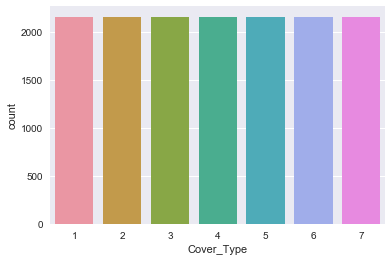

In [12]:
sns.countplot(data=train_df,x='Cover_Type')

Interesting -- Each Cover_Type has same amount of records!!

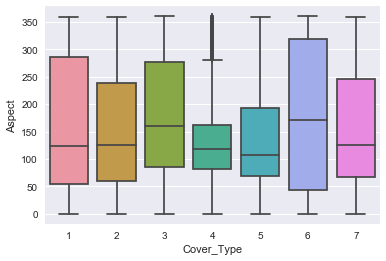

In [13]:
sns.boxplot(x="Cover_Type",y='Aspect' ,data=train_df);

No outliers in the data

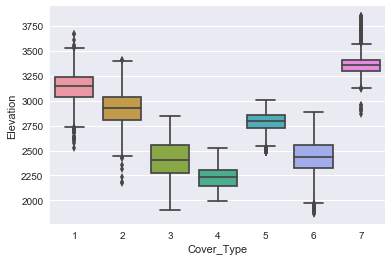

In [14]:
sns.boxplot(x="Cover_Type",y='Elevation' ,data=train_df);

Insignificant Outliers
"Cover_Type" 1 and 7 have higher "Elevation" than others; 4th has the lowest

### Data looks ready for Modeling

# Random Forest

In [15]:
y = train_df['Cover_Type']
train_df1 = train_df.drop('Cover_Type',1)

Train-Test split for Cross-validation

In [16]:
X_train, X_test, y_train, y_test = train_test_split(train_df1,y,random_state=23)

In [17]:
rf = RandomForestClassifier(n_estimators=350,n_jobs=1,random_state=23)

In [18]:
time_begin = datetime.datetime.now()
rf.fit(X_train,y_train)
time_end = datetime.datetime.now()
time_delta = time_end-time_begin
print ('Total time in seconds',time_delta.total_seconds())

accu = rf.score(X_test,y_test)
print (accu)

Total time in seconds 7.4318
0.863492063492


Fitting with complete dataset 

In [19]:
time_begin = datetime.datetime.now()
rf.fit(train_df1,y)
time_end = datetime.datetime.now()
time_delta = time_end-time_begin
print ('Total time in seconds',time_delta.total_seconds())

time_begin = datetime.datetime.now()
final = rf.predict(test_df)
time_end = datetime.datetime.now()
time_delta = time_end-time_begin
print ('Total time in seconds',time_delta.total_seconds())
print (final)

Total time in seconds 9.740216
Total time in seconds 76.961178
[2 1 2 ..., 3 3 3]


In [20]:
output_df=pd.DataFrame(Id)
output_df['Cover_Type']=final
output_df

output_df.to_csv("submission_RFC.csv",index=False)

### This generated a score of 0.75450
Seems like a case of Overfitting
-- One reason could be less data only 15K rows

K-fold cross calidation does not make sense with such low data
train_test_split is good enough.
Now we'll tweak parameters to reduce overfitting

n_estimators is an important parameter


/usr/local/lib/python3.5/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


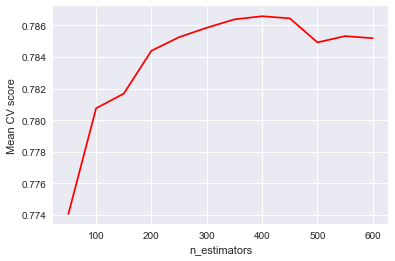

In [21]:
from sklearn.learning_curve import validation_curve
import numpy as np

prange=np.arange(50,650,50)
train_scores, cv_scores = validation_curve(rf, train_df1, y,param_name='n_estimators',
                                              param_range=prange)

plt.xlabel('n_estimators')
plt.ylabel('Mean CV score')
plt.plot(prange, np.mean(cv_scores, axis=1), label="Cross-validation score",color="r")

After n_estimators=400 the cross-validation score begins to decrease again, so we will use 400

In [22]:
rf = RandomForestClassifier(n_estimators=400,n_jobs=2,random_state=23)

In [23]:
time_begin = datetime.datetime.now()
rf.fit(X_train,y_train)
time_end = datetime.datetime.now()
time_delta = time_end-time_begin
print ('Total time in seconds',time_delta.total_seconds())

accu = rf.score(X_test,y_test)
print (accu)

Total time in seconds 5.106826
0.863492063492


Total Time after increasing n_estimators to an optimum value reduced from 7 sec to 5 sec
Negligible change in accuracy

Fitting with complete dataset

In [24]:
time_begin = datetime.datetime.now()
rf.fit(train_df1,y)
time_end = datetime.datetime.now()
time_delta = time_end-time_begin
print ('Total time in seconds',time_delta.total_seconds())

time_begin = datetime.datetime.now()
final = rf.predict(test_df)
time_end = datetime.datetime.now()
time_delta = time_end-time_begin
print ('Total time in seconds',time_delta.total_seconds())
print (final)

Total time in seconds 5.87867
Total time in seconds 66.297642
[2 1 2 ..., 3 3 3]


Time reduced from 10 sec to 7.5 sec and 69 to 62 seconds

### Score Decresed to 0.75370

Lets try with lesser number of features (As high number of features is the most common cause of overfitting)

In [25]:
rf = RandomForestClassifier(n_estimators=400,n_jobs=2,random_state=23,max_features=0.70)

In [26]:
time_begin = datetime.datetime.now()
rf.fit(X_train,y_train)
time_end = datetime.datetime.now()
time_delta = time_end-time_begin
print ('Total time in seconds',time_delta.total_seconds())

accu = rf.score(X_test,y_test)
print (accu)

Total time in seconds 15.029962
0.862962962963


Time increased and accuracy decreased (We'll compare with the final submitted score)

In [27]:
time_begin = datetime.datetime.now()
rf.fit(train_df1,y)
time_end = datetime.datetime.now()
time_delta = time_end-time_begin
print ('Total time in seconds',time_delta.total_seconds())

time_begin = datetime.datetime.now()
final = rf.predict(test_df)
time_end = datetime.datetime.now()
time_delta = time_end-time_begin
print ('Total time in seconds',time_delta.total_seconds())
print (final)

Total time in seconds 18.766052
Total time in seconds 56.770465
[5 1 1 ..., 6 6 6]


In [28]:
output_df=pd.DataFrame(Id)
output_df['Cover_Type']=final
output_df

output_df.to_csv("submission_RFC.csv",index=False)

### Final Score improved to 0.74637 but still lesser than original score of 0.75430

oob_score = TRUE
This is a random forest cross validation method. It is very similar to leave one out validation technique, however, this is much faster. This method simply tags every observation used in different tress. And then it finds out a maximum vote score for every observation based on only trees which did not use this particular observation to train itself.

In [29]:
rf = RandomForestClassifier(n_estimators=375,n_jobs=2,random_state=23,oob_score=True,max_features=0.70)

In [30]:
time_begin = datetime.datetime.now()
rf.fit(X_train,y_train)
time_end = datetime.datetime.now()
time_delta = time_end-time_begin
print ('Total time in seconds',time_delta.total_seconds())

accu = rf.score(X_test,y_test)
print (accu)

Total time in seconds 15.140218
0.862962962963


In [41]:
cross_validation.cross_val_score(rf,train_df1,y,scoring='accuracy').mean()

0.78392857142857142

In [44]:
cross_validation.cross_val_score(rf,X_test,y_test,scoring='accuracy').mean()

0.79392155375180684

In [32]:
time_begin = datetime.datetime.now()
rf.fit(train_df1,y)
time_end = datetime.datetime.now()
time_delta = time_end-time_begin
print ('Total time in seconds',time_delta.total_seconds())

time_begin = datetime.datetime.now()
final = rf.predict(test_df)
time_end = datetime.datetime.now()
time_delta = time_end-time_begin
print ('Total time in seconds',time_delta.total_seconds())
print (final)

Total time in seconds 18.680489
Total time in seconds 51.582593
[5 1 1 ..., 6 6 6]


In [33]:
output_df=pd.DataFrame(Id)
output_df['Cover_Type']=final
output_df

output_df.to_csv("submission_RFC.csv",index=False)

#### Score decreased to 0.74622

## Original method gave the best results Score = 0.75430

------------------------------------------------------------------------------------------

Trying other Classifiers  

# KNN Classifier

This will require scaling of dataset -- Using StandardScaler from sklearn

In [34]:
from sklearn import preprocessing
    
train_scale=train_df1.copy()
test_scale=test_df.copy()

col_to_scale = train_scale.ix[:,0:10]

for col in col_to_scale:
    scaler = preprocessing.StandardScaler().fit(train_df[col].values.astype('float_'))
    train_scale[col] = scaler.transform(train_df1[col].values.astype('float_'))
    test_scale[col] = scaler.transform(test_df[col].values.astype('float_'))

/usr/local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.re

In [35]:
train_scale.ix[:,0:10].describe()
# Confirmed mean = 0 and std dev= 1: Data is Standardised for numerical columns

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,1.512000e+04,1.512000e+04,1.512000e+04,1.512000e+04,1.512000e+04,1.512000e+04,1.512000e+04,1.512000e+04,1.512000e+04,1.512000e+04
mean,3.609106e-16,1.203035e-16,-2.048920e-16,4.511382e-17,-3.759485e-18,8.270868e-17,-3.637302e-16,4.812141e-16,6.015177e-17,9.022765e-17
std,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00
min,-2.122093e+00,-1.423270e+00,-1.952008e+00,-1.081532e+00,-3.218239e+00,-1.293580e+00,-6.960156e+00,-5.261370e+00,-2.943587e+00,-1.373895e+00
25%,-8.938338e-01,-8.328021e-01,-7.690867e-01,-7.625885e-01,-7.524248e-01,-7.169865e-01,-5.466017e-01,-5.247795e-01,-6.339000e-01,-7.101984e-01
50%,6.410523e-03,-2.786705e-01,-1.776260e-01,-2.246683e-01,-3.115176e-01,-3.003898e-01,2.387315e-01,1.769376e-01,6.336391e-02,-2.319731e-01
75%,8.491925e-01,9.476862e-01,6.504190e-01,4.893850e-01,4.559875e-01,4.195980e-01,7.295648e-01,7.032254e-01,6.952593e-01,4.337691e-01
max,2.632921e+00,1.847014e+00,4.199183e+00,5.311625e+00,8.212688e+00,3.906331e+00,1.351287e+00,1.536514e+00,2.460209e+00,4.983955e+00


In [36]:
time_begin = datetime.datetime.now()
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(train_scale,y)

pred_knn=knn.predict(test_scale)
time_end = datetime.datetime.now()
time_delta = time_end-time_begin
print ('Total time in seconds',time_delta.total_seconds())

print (pd.Series(pred_knn).value_counts(sort=False))

Total time in seconds 259.866078
1    198009
2    204255
3     34372
4      4832
5     55539
6     29628
7     39257
dtype: int64


In [40]:
cross_validation.cross_val_score(knn,train_scale,y,scoring='accuracy').mean()

0.67671957671957672

In [42]:
output_df=pd.DataFrame(Id)
output_df['Cover_Type']=pred_knn
output_df

output_df.to_csv("submission_RFC.csv",index=False)

## Score on submission = 0.64546
Its expected as the cross_val_score is much lesser than the RandomForest Model

-----------------------------------------------------------------------------------------

# Running Logistic Regression

In [57]:
train_scale.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,-0.367095,-0.959980,-1.597132,0.146639,-0.834074,-0.908681,0.271454,0.571653,0.281259,4.334805,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,-0.381461,-0.914559,-1.715424,-0.072337,-0.932054,-0.999246,0.238732,0.703225,0.346627,4.285710,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0.130912,-0.160577,-0.887379,0.194243,0.227369,1.106379,0.696843,0.834797,-0.002005,4.191156,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.085421,-0.015231,0.177250,0.070474,1.092853,1.038455,0.827731,0.834797,-0.285268,4.272981,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,-0.369489,-1.014485,-1.715424,-0.353198,-0.850404,-0.998491,0.238732,0.659368,0.324838,4.237524,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [58]:
test_scale.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,-0.165977,1.792510,-0.295918,-1.081532,-0.834074,0.732045,-0.546602,-0.217778,0.455575,4.667563,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,-0.158794,-1.423270,-0.414210,-1.081532,-0.834074,0.709404,-0.382991,-0.130064,0.368417,4.694838,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,-0.086966,-1.277924,-0.177626,-1.081532,-0.834074,0.955438,-0.219380,-0.480922,0.041574,4.393901,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,-0.096543,-1.205251,0.058958,-1.081532,-0.834074,0.932797,-0.153935,-0.787923,-0.219900,4.421177,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,-0.103726,-1.159831,0.295543,-1.081532,-0.834074,0.910156,-0.088491,-1.051067,-0.437795,4.448452,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [55]:
y_train = train_df['Cover_Type']

In [56]:
X_train = train_df.drop('Cover_Type',1)